In [1]:
# importing libraries 
import pandas as pd 
import numpy as np # importing libraries 
import torch
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import matplotlib.pyplot as plt 

## EDA With the dataset!!

In [2]:
df= pd.read_csv('articles.csv')
df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
remove_cols=['product_code','product_type_no','graphical_appearance_no','colour_group_code','index_code',
             'index_group_no','section_no','garment_group_no','perceived_colour_value_id',
             'perceived_colour_master_id','department_no']
df=df.drop(remove_cols,axis=1)

df['article_id'] = df['article_id'].astype(str)
df['article_id']=["0"+x for x in df['article_id']]

In [4]:
df.columns

Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc'],
      dtype='object')

In [5]:
df

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0953450001,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,0957375001,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories,Large plastic hair claw.


In [9]:
df['product_group_name'].value_counts()

product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: count, dtype: int64

In [14]:
df.loc[df['product_group_name']== 'Socks & Tights','product_type_name'].value_counts()

product_type_name
Socks               1889
Underwear Tights     546
Leg warmers            7
Name: count, dtype: int64

In [15]:
df.loc[df['product_group_name']== 'Nightwear','product_type_name'].value_counts()

product_type_name
Pyjama set                  1120
Pyjama jumpsuit/playsuit     388
Pyjama bottom                220
Night gown                   171
Name: count, dtype: int64

we can conclude that we can drop 'Socks & Tights' and nightwear

In [17]:
product_groups_list=['Garment Upper body','Garment Lower body','Garment Full body','Shoes','Swimwear','Unknown']
df = df.loc[df['product_group_name'].isin(product_groups_list)].reset_index()

df

,index,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,8,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
4,11,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Dusty Light,Grey,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic,Sweatshirt in soft organic cotton with a pres...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84371,105535,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,105536,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,105538,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,105539,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [20]:
df['product_group_name'].value_counts()

product_group_name
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Shoes                  5283
Swimwear               3127
Unknown                 121
Name: count, dtype: int64

In [8]:
df.loc[(df['product_group_name'] == 'Unknown') & (df['department_name']=='Ladies Sport Bras'),'detail_desc'][66105]

'Wide sports top in fast-drying functional fabric with a slightly wider neckline and short cap sleeves. Rounded and slightly longer at the back.'

In [ ]:
# pd.DataFrame(df[['product_type_name','prod_name','detail_desc']].value_counts()).sort_values(by=['product_type_name','prod_name']).to_csv('Prod_details.csv')

# Taking a Sample dataset to check #

In [9]:
df.columns

Index(['index', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
df.head()

In [10]:
rem_col =['index','perceived_colour_value_name','perceived_colour_master_name','index_name','department_name','section_name', 'index_group_name','garment_group_name']
df2 = df.drop(rem_col, axis=1)
df2.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights with built-in support to lift the botto...
4,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Sweatshirt in soft organic cotton with a pres...


In [ ]:
df2.tail()

In [21]:
df[:5]

,index,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,8,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
4,11,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Dusty Light,Grey,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic,Sweatshirt in soft organic cotton with a pres...


In [11]:
df['detail_desc'][4]

'Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.'

In [12]:
df['prod_name'][4]

'SWEATSHIRT  OC'

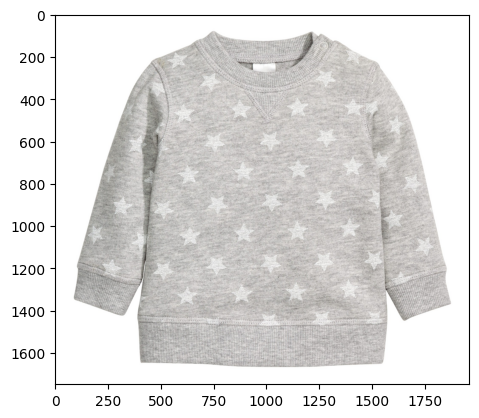

In [15]:
img_path = df['article_id'][4]
folder = img_path[0:3]
path_to_img = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/images/' + folder +'/'+ img_path +'.jpg'
with Image.open(path_to_img) as img:
    plt.imshow(img)

## Text and Image Embedding

In [14]:
import os
from PIL import Image
import numpy as np
import os

In [ ]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

model_ID = "openai/clip-vit-base-patch32"

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
def text_embed(txt :str):
    inputs = tokenizer(text, return_tensors = "pt")
	text_embeddings = model.get_text_features(**inputs)

    return text_embeddings.cpu().detach().numpy()

def load_images(img: str):
    folder = img[0:3]
    path_to_img = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/images/' + folder +'/'+ img+'.jpg'
    
    with Image.open(path_to_img) as img:
        image = processor(text = None,images = img,return_tensors="pt")["pixel_values"].to(device)

    embedding = model.get_image_features(image)	
    return embedding.cpu().detach().numpy()


In [ ]:
df['article_id'][0]

In [ ]:
im = load_images('0108775015')
print(type(im))